# Styles and formatting

Any `Element` object in <b><font color="blue" style="font-family:'Courier New'">fivecentplots </font></b> (legend, axis, label, etc.) has certain properties like edge color, fill color, font size that can be styled.  Each of the properties can be set by passing the appropriate keyword to the function call to make the plot <b>or</b> by setting a new default value in a custom theme file.  Examples of style changes are described below.

## Setup

### Imports

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import fivecentplots as fcp
import pandas as pd
import numpy as np
import seaborn as sns
import os, sys, pdb
osjoin = os.path.join
st = pdb.set_trace

### Sample data

In [2]:
df = pd.read_csv(r'C:\GitHub\fivecentplots\fivecentplots\tests\fake_data.csv')
df.head()

,Substrate,Target Wavelength,Boost Level,Temperature [C],Die,Voltage,I Set,I [A]
0,Si,450,0.2,25,"(1,1)",0.0,0.0,0.0
1,Si,450,0.2,25,"(1,1)",0.1,0.0,0.0
2,Si,450,0.2,25,"(1,1)",0.2,0.0,0.0
3,Si,450,0.2,25,"(1,1)",0.3,0.0,0.0
4,Si,450,0.2,25,"(1,1)",0.4,0.0,0.0


### Set theme

Optionally set the design theme

In [3]:
#fcp.set_theme('gray')
#fcp.set_theme('white')

### Other

In [4]:
SHOW = False

## Colors

### Line colors

<b><font color="blue" style="font-family:'Courier New'">fivecentplots </font></b> comes with a built-in list of line (and marker) colors.  This color pattern repeats indefinetly in case the number of plotted lines exceeds the length of the built-in list.

#### Built-in color list

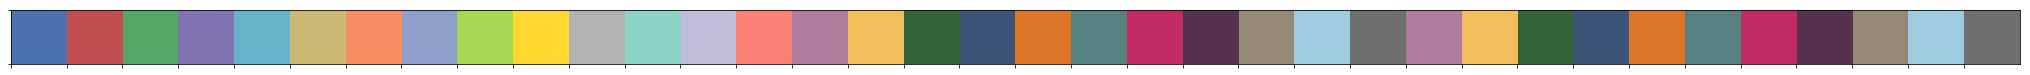

In [5]:
from fivecentplots.layout import DEFAULT_COLORS
sns.palplot(sns.color_palette(DEFAULT_COLORS))

I [A] vs Voltage.png


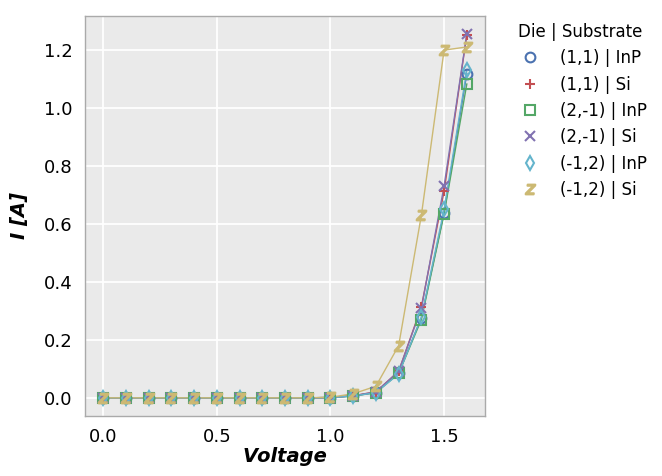

In [6]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], \
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25')

#### Custom color list

The built-in list of colors can be overriden by passing a list of hex-based color codes to the `colors` keyword.  Like the built-in list, the custom list will also cycle back to the start if there are more lines than colors.

I [A] vs Voltage.png


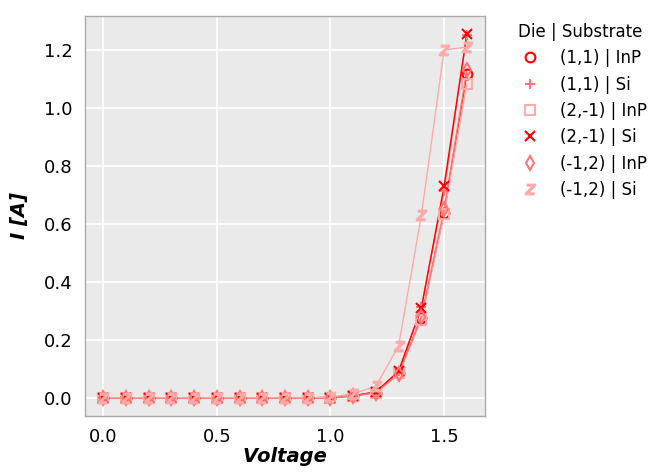

In [7]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], \
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         colors=['#FF0000', '#FF7777', '#FFAAAA'])

#### Colormap

The color list can also be replaced by a discretized colormap using the keyword `cmap`

I [A] vs Voltage.png


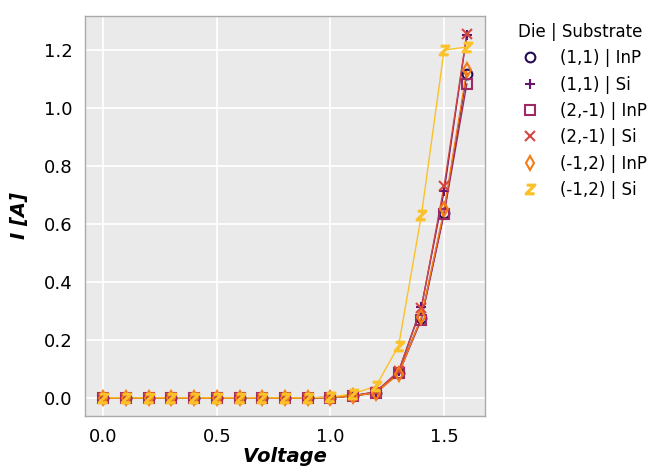

In [8]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], \
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         cmap='inferno')

### Fill colors

Many elements in a plot are capable of having a fill color (axes, figure background, markers, etc.).  These fill colors are accessible using the standard keyword nomenclature of the element name followed by an underscore and the keyword `fill_color`. 

I [A] vs Voltage.png


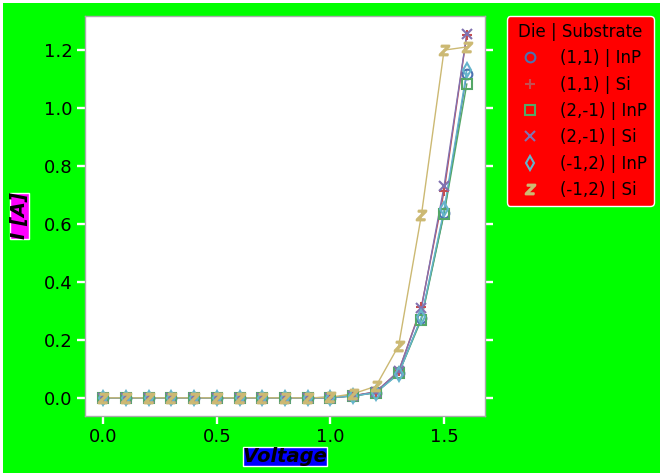

In [9]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], \
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         fig_fill_color='#00FF00', legend_fill_color='#FF0000', ax_fill_color='#FFFFFF',
         label_x_fill_color='#0000FF', label_y_fill_color='#FF00FF')

### Edge colors

Many elements in a plot also support an edge color (i.e., the border around an object).  These edge colors are accessible using the standard keyword nomenclature of the element name followed by an underscore and the keyword `edge_color`. 

I [A] vs Voltage.png


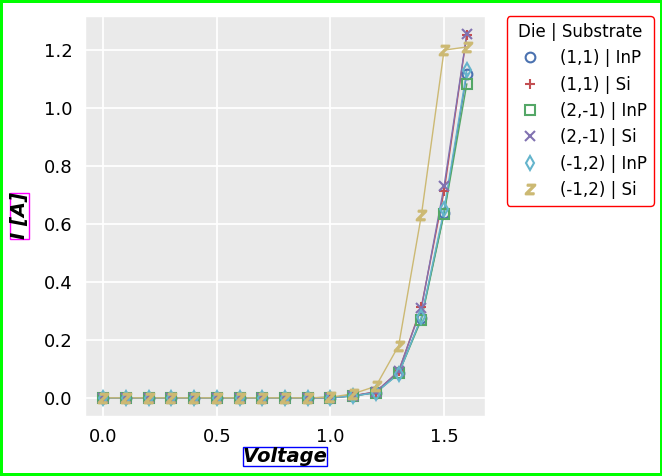

In [10]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], \
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         fig_edge_color='#00FF00', legend_edge_color='#FF0000', ax_edge_color='#FFFFFF',
         label_x_edge_color='#0000FF', label_y_edge_color='#FF00FF')

#### Spines

One special case of `edge_color` is the "spines" or borders around an axis area.  These can be turned on or off individually using the keyword `spine_<bottom|top|left|right>` or `spines` to address all of them together.

I [A] vs Voltage.png


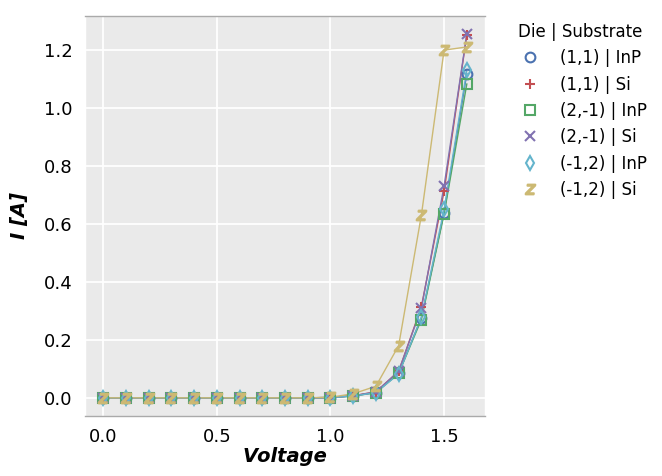

In [11]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], \
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         spine_left=False, spine_right=False)

### Alpha

Elements also support alpha for transparency.  By default alpha=1 for all elements, but can be changed using the standard keyword nomenclature of the element name followed by an underscore and the keyword `fill_alpha` or `edge_alpha`.

I [A] vs Voltage.png


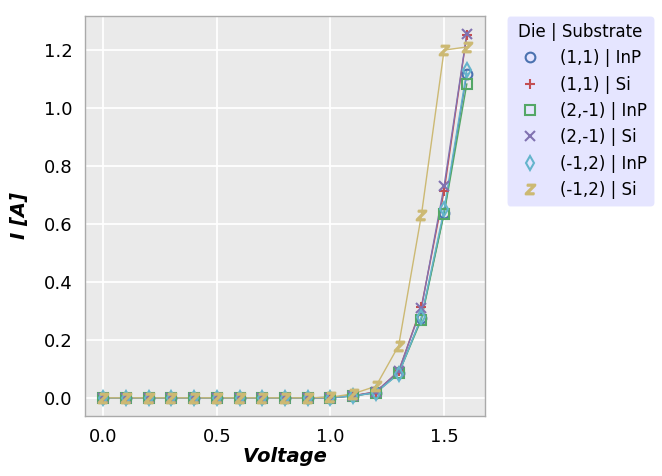

In [12]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], \
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         legend_fill_color='#0000FF', legend_fill_alpha=0.1)

Plot line alpha can also be set using the `lines_alpha` keyword

I [A] vs Voltage.png


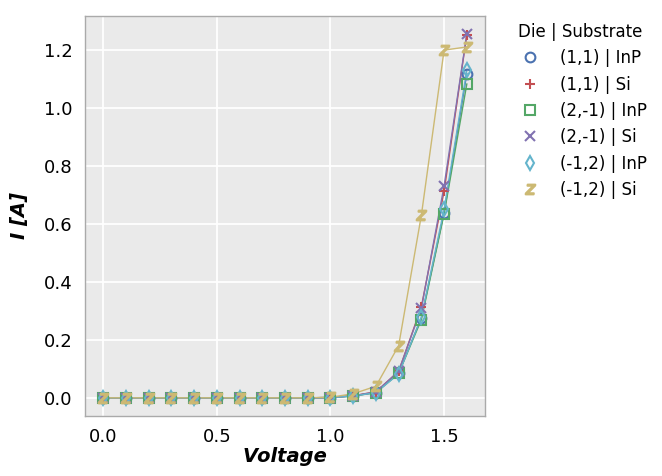

In [13]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], \
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         lines_alpha=0.2)

### Boxplot example

In [17]:
df_box = pd.read_csv(osjoin(os.path.dirname(fcp.__file__), 'tests', 'fake_data_box.csv'))
fcp.boxplot(df=df_box, y='Value', groups=['Batch', 'Sample'], show=SHOW, 
            box_fill_color=[0, 0, 1, 1, 2, 2], box_fill_alpha=0.3, box_edge_width=0,
            marker_edge_color=[0, 0, 1, 1, 2, 2], marker_type=['o', '+'])

AttributeError: 'list' object has no attribute 'ranges'

ValueError: Invalid RGBA argument: <fivecentplots.layout.RepeatedList object at 0x0000027E719BEDA0>

## Markers

<b><font color="blue" style="font-family:'Courier New'">fivecentplots </font></b> comes with a built-in list of marker styles:

<img src="_static/images/markers.png">

You can specify your own markers by passing a list of marker string names to the `markers` keyword.  As with colors, the marker list will loop back on itself if the number of curves exceeds the number of items in the list.

I [A] vs Voltage.png


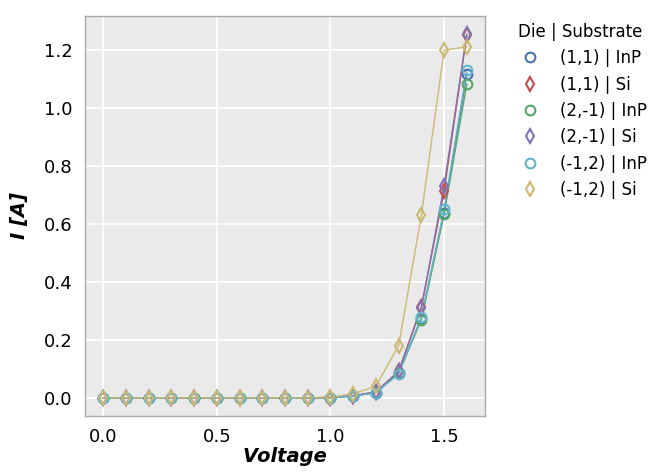

In [15]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], \
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         markers=['o', 'd'])

## Fonts

All text elements (plot title, labels, etc.) can be styled via the font attributes associated with the object (see <a href=https://endangeredoxen.github.io/fivecentplots/keyword.html#default-attributes>Default Attributes</a>).  Please note that the font family "fantasy" below looks an awful lot like comic sans which really should be banned globally.

I [A] vs Voltage.png


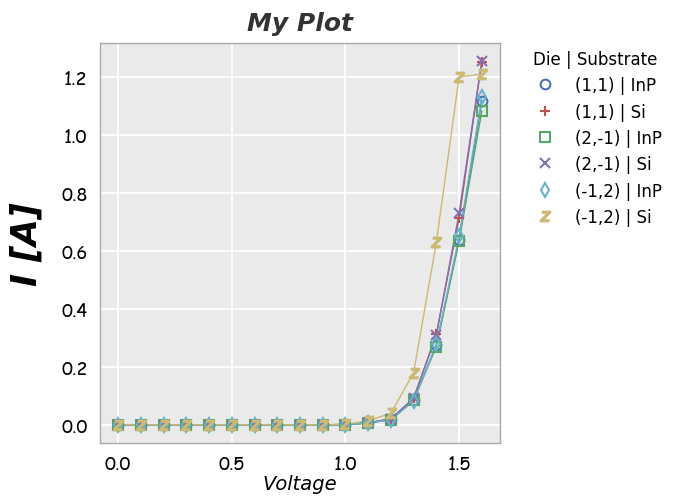

In [16]:
fcp.plot(df=df, x='Voltage', y='I [A]', legend=['Die', 'Substrate'], \
         filter='Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25',
         title='My Plot', title_font_style='italic', 
         label_y_font_size=25, label_y_style='normal',
         label_x_font_weight='normal',
         tick_labels_major_font='fantasy')

## Themes

Theme files are used to apply user style preferences to all plots.  These `.py` files are populated with dictionaries and lists of style settings.  A theme file can be applied globally using the command `fcp.set_theme()`.  Once a theme file is selected, a local copy is made in a <Users>/.fivecentplots directory.  <b><font color="blue" style="font-family:'Courier New'">fivecentplots </font></b> provides both a "gray" and and "white" theme to get started.  You can modify this local file as you wish to get the exact, consistent look you desire.
    
    
<br>The theme file consists of three main parts:

<br>
1) `fcp_params`:  this is a python dictionary that contains any `fcp` keyword argument for which you want to override the default:

    fcp_params = {'ax_edge_color': '#aaaaaa',
                  'ax_fill_color': '#eaeaea',
                  'ax_size': [400,400],  # [width, height]
                 }
             
<br>2) `colors`: a list of default colors

    colors = ['#000000', '#111111', '#222222']

<br>3) `markers`: a list of default markers

    markers = ['+', 'o', 'd', '$']

<br>The order of preference for assigning element attributes when plot elements are created is:

<br>1) keywords in the function call

<br>2) keywords defined in the local theme file

<br>3) built-in default values